# Ads CTR Forecasting using Python

Ads CTR Analysis stands for Click-Through Rate Analysis for advertisements. Ads CTR Analysis is the process of examining the effectiveness of online advertisements by measuring the rate at which users click on an ad’s link to reach the advertiser’s website.

# Ads CTR Forecasting: Process We Can Follow

Ads CTR Analysis and Forecasting are crucial for businesses to assess the return on investment (ROI) of their advertising efforts and make data-driven decisions to improve ad performance. Below are the steps we can follow for the task of Ads CTR Analysis and Forecasting:

- Gather ad data, including the number of ad impressions (how often an ad was shown), the number of clicks, and any other relevant metrics.
- Explore the data to understand its characteristics and distribution. Calculate basic statistics, such as the mean CTR (Click-Through Rate) and standard deviation.
- Create visualizations, such as line charts or bar graphs, to represent CTR trends over time.
- Conduct A/B tests if necessary to compare the performance of different ad variations.
- Analyze the CTR data to identify factors that influence ad performance.
- Build a forecasting model to predict future CTR values.

In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [3]:
data= pd.read_csv('ctr.csv')

In [4]:
data.head()

,Date,Clicks,Impressions
0,2022-10-19,2851,58598
1,2022-10-20,2707,57628
2,2022-10-21,2246,50135
3,2022-10-22,1686,40608
4,2022-10-23,1808,41999


Let’s start by converting the Date column in the DataFrame from a string format to a datetime format and then setting it as the index of the DataFrame:

In [9]:
#Data preparation
data['Date']= pd.to_datetime(data['Date'],format= '%Y/%m/%d')
data.set_index('Date',inplace= True)

In [11]:
data.head()

,Clicks,Impressions
Date,,
2022-10-19,2851,58598
2022-10-20,2707,57628
2022-10-21,2246,50135
2022-10-22,1686,40608
2022-10-23,1808,41999


Now, let's Visualize the clicks and impressions over the time

In [32]:
#Visualize clicks and impressions
fig =go.Figure()

In [33]:
fig.add_trace(go.Scatter(x=data.index,
                         y= data['Clicks'],
                         mode='lines',
                         name= 'Clicks'))
fig.add_trace(go.Scatter(x=data.index,
                         y=data['Impressions'],
                         mode='lines',
                         name='Impressions'))
fig.update_layout(title='Clicks and Impressions Over Time')
fig.show()

In [21]:
#Creating a scatter plot to vosualize the relationship between Clicks and Impressions
fig = px.scatter(data, x= 'Clicks', y= 'Impressions',
                 title= 'Relationship between Clicks and Impressions',
                labels={'Clicks':'Clicks', 'Impressions': 'Impressions'})

In [23]:
fig.update_layout(xaxis_title= 'Clicks', 
                 yaxis_title='Impressions')
fig.show()

So, the relationship between clicks and impressions is linear. It means higher ad impressions result in higher ad clicks. Now, let’s calculate and visualize CTR over time:

In [25]:
#Visualize CTR
data['CTR']= (data['Clicks'] / data['Impressions'])*100

In [27]:
data.head()

,Clicks,Impressions,CTR
Date,,,
2022-10-19,2851,58598,4.865354
2022-10-20,2707,57628,4.697369
2022-10-21,2246,50135,4.479904
2022-10-22,1686,40608,4.151891
2022-10-23,1808,41999,4.304864


In [34]:
fig= px.line(data,
             x=data.index,
             y= 'CTR',
             title= 'Click-Through Rate (CTR) Over Time')
fig.show()

Now let's have a look at the average CTR by day of the week:

In [39]:
data['DayOfWeek']= data.index.dayofweek
data['WeekOfMonth']= data.index.week //4


C:\Users\pc\AppData\Local\Temp/ipykernel_13436/186591747.py:2: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



In [41]:
data['DayOfWeek']

Date
2022-10-19    2
2022-10-20    3
2022-10-21    4
2022-10-22    5
2022-10-23    6
             ..
2023-10-14    5
2023-10-15    6
2023-10-16    0
2023-10-17    1
2023-10-18    2
Name: DayOfWeek, Length: 365, dtype: int64

In [46]:
#EDA based on DayOfWeek
day_of_week_ctr= data.groupby('DayOfWeek')['CTR'].mean().reset_index()

In [48]:
day_of_week_ctr['DayOfWeek']= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [49]:
day_of_week_ctr

,DayOfWeek,CTR
0,Mon,4.174384
1,Tue,4.274768
2,Wed,4.273197
3,Thu,4.252425
4,Fri,3.995702
5,Sat,3.688105
6,Sun,3.976570


In [50]:
fig= px.bar(day_of_week_ctr,x= 'DayOfWeek', y='CTR',title='Average CTR by Day of the Week' )

In [51]:
fig.show()

ow, let’s compare the CTR on weekdays and weekends:

In [52]:
#Create a new column 'DayCategory' to categorize weekdays and weekends
data['DayCategory']= data['DayOfWeek'].apply(lambda x:'Weekend' if x>5 else 'Weekday')

In [56]:
#Calculate average CTR for weekdays and weekends
ctr_by_day_category= data.groupby('DayCategory')['CTR'].mean().reset_index()

In [57]:
ctr_by_day_category

,DayCategory,CTR
0,Weekday,4.110286
1,Weekend,3.976570


In [58]:
#Create a bar plot to compare CTR on weekdays vs.weekends
fig= px.bar(ctr_by_day_category, x= 'DayCategory', y='CTR', title='Comparison of CTR on Weekdays vs. Weekends',
            labels={'CTR':'Average CTR'})

In [59]:
#Customize the layout
fig.update_layout(yaxis_title='Average CTR')

Now, let’s compare the impressions and clicks on weekdays and weekends:

In [63]:
#group the data by 'DayCategory' and calculate the sum of clicks and impression for each category
grouped_data= data.groupby('DayCategory')[['Clicks' , 'Impressions']].sum().reset_index()

In [64]:
grouped_data

,DayCategory,Clicks,Impressions
0,Weekday,660663,15758432
1,Weekend,95023,2350210


In [65]:
#Create a grouped bar chart to visualize Clicks and impressions on weekdays vs. weekend
fig=px.bar(grouped_data, x= 'DayCategory',
           y=['Clicks', 'Impressions'],
          title= 'Impressions and Clicks on Weekdays vs. Weekends',
          labels={'value': 'Count', 'variable': 'Metric'},
          color_discrete_sequence=['blue', 'Green'])

In [66]:
#Customize the layout
fig.update_layout(yaxis_title='Count')
fig.update_xaxes(title_text='DayCategory')

# Ads CTR Forecasting

Now, let’s see how to forecast the Ads CTR. As CTR is dependent on impressions and impressions change over time, we can use Time Series forecasting techniques to forecast CTR. As CTR is seasonal, let’s calculate the p, d, and q values for the SARIMA model:

In [70]:
data.head()

,Date,Clicks,Impressions,CTR,DayOfWeek,WeekOfMonth,DayCategory
0,2022-10-19,2851,58598,4.865354,2,10,Weekday
1,2022-10-20,2707,57628,4.697369,3,10,Weekday
2,2022-10-21,2246,50135,4.479904,4,10,Weekday
3,2022-10-22,1686,40608,4.151891,5,10,Weekday
4,2022-10-23,1808,41999,4.304864,6,10,Weekend


In [69]:
data.reset_index(inplace=True)

In [71]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [72]:
#resetting index
time_series = data.set_index('Date')['CTR']

In [73]:
time_series

Date
2022-10-19    4.865354
2022-10-20    4.697369
2022-10-21    4.479904
2022-10-22    4.151891
2022-10-23    4.304864
                ...   
2023-10-14    3.106680
2023-10-15    3.528708
2023-10-16    3.895605
2023-10-17    4.275215
2023-10-18    3.898292
Name: CTR, Length: 365, dtype: float64

In [76]:
#Differencing
differenced_series = time_series.diff().dropna()

In [77]:
differenced_series

Date
2022-10-20   -0.167984
2022-10-21   -0.217465
2022-10-22   -0.328013
2022-10-23    0.152973
2022-10-24   -0.302428
                ...   
2023-10-14   -0.607923
2023-10-15    0.422028
2023-10-16    0.366897
2023-10-17    0.379610
2023-10-18   -0.376923
Name: CTR, Length: 364, dtype: float64

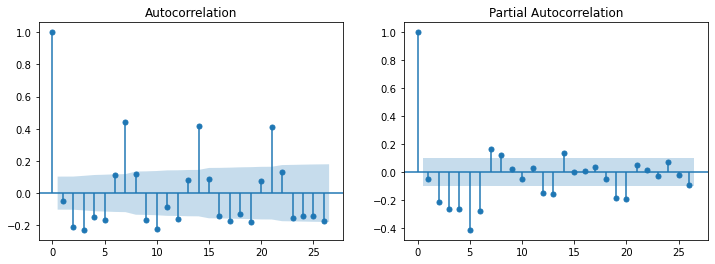

In [80]:
#Plot ACF and PACF of differenced time series
fig, axes = plt.subplots(1,2, figsize=(12,4))
plot_acf(differenced_series, ax= axes[0])
plot_pacf(differenced_series, ax= axes[1])
plt.show()

In [81]:
axes

array([<AxesSubplot:title={'center':'Autocorrelation'}>,
       <AxesSubplot:title={'center':'Partial Autocorrelation'}>],
      dtype=object)

Now, let’s train the forecasting model using SARIMA:

In [83]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [84]:
p, d, q, s = 1,1,1,12

In [85]:
model = SARIMAX(time_series, order= (p,d,q), seasonal_order=( p,d,q,s))
results = model.fit()
print(results.summary())

C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



                                     SARIMAX Results                                      
Dep. Variable:                                CTR   No. Observations:                  365
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -71.365
Date:                            Sat, 17 Feb 2024   AIC                            152.730
Time:                                    20:07:35   BIC                            172.048
Sample:                                10-19-2022   HQIC                           160.418
                                     - 10-18-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5264      0.070      7.509      0.000       0.389       0.664
ma.L1         -0.9048      0.036   

Now, here’s see how to predict the future CTR values:

In [86]:
# Predict future values
future_step =100
predictions = results.predict(len(time_series),len(time_series) + future_step - 1)

In [87]:
predictions

2023-10-19    3.852419
2023-10-20    3.889522
2023-10-21    3.820370
2023-10-22    3.727592
2023-10-23    3.710462
                ...   
2024-01-22    3.545767
2024-01-23    3.466843
2024-01-24    3.561388
2024-01-25    3.546893
2024-01-26    3.580327
Freq: D, Name: predicted_mean, Length: 100, dtype: float64

Now, let’s visualize the forecasted trend of CTR:

In [89]:
#Create a DataFrame with the original data and predictions
forecast = pd.DataFrame({'Original': time_series, 'Predictions': predictions})

In [93]:
#Plot the original data and predictions
fig = go.Figure()

In [94]:
fig.add_trace(go.Scatter(x=forecast.index, y=forecast['Predictions'],
                        mode='lines', name='Predictions'))
fig.add_trace(go.Scatter(x=forecast.index, y=forecast['Original'],
                        mode='lines', name='Original Data'))

In [95]:
fig.update_layout(title='CTR Forecasting',
                  xaxis_title='Time Period',
                  yaxis_title='Impressions',
                  legend=dict(x=0.1, y=0.9),
                  showlegend=True)

fig.show()

# Summary 


So, this is how we can analyze and forecast CTR using Python. Ads Click Through Rate Analysis and Forecasting are crucial for businesses to assess the return on investment (ROI) of their advertising efforts and make data-driven decisions to improve ad performance. I hope you liked this article on Ads CTR Analysis and Forecasting using Python. Feel free to ask valuable questions in the comments section below.